# 1.Data collection

In [1]:
import pandas as pd 
import seaborn as sns
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 2.Understanding the dataset

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


# 3.Stats Summary

In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# 4.Realtionship check

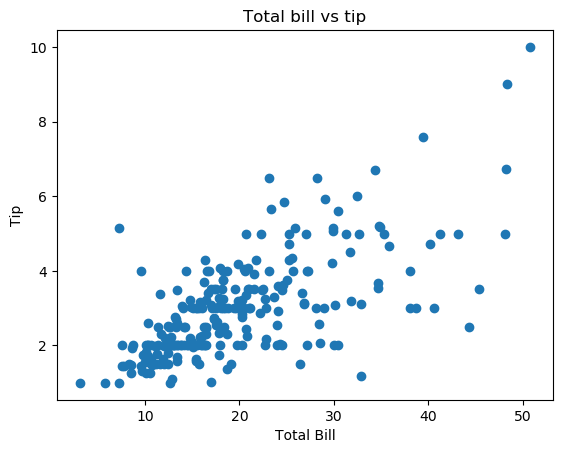

In [13]:
#before using any model, we must confirm relationship..?

import matplotlib.pyplot as plt

plt.scatter(df["total_bill"],df["tip"])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total bill vs tip")
plt.show()

In [ ]:
#obervation
#AS bill increases tip increases
#Relationshio =Straight line (we can use linear regrssion)

# 5.Feature & Target Separation

In [15]:
x=df[["total_bill"]] #feature i/p 2d only
y=df["tip"] #feature i/p 1d


# 6.Train-test split

In [ ]:
# A model must perform well on unseen data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)#80%--on traning 20%--testing

# 7.Feature Standardization

In [18]:
#1.compare the co-efficients fairly
#2.Avoid the Dominance of Large values
#3.Prepare for Ridge/Lasso

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

#Imp:
#!.fit only on training data
#2.Prevents the data leakage

# 8.Train Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(x_train_scaled,y_train)

print("co-efficeint : " ,model.coef_)
print("Intercept : ",model.intercept_)




co-efficeint :  [0.93571714]
Intercept :  3.0877948717948724


# 9.Model Evaluation

In [23]:
#prediction
y_pred=model.predict(x_test_scaled)

from sklearn.metrics import *
r2=r2_score(y_test,y_pred)
print("r2 score:",r2)

import numpy as np
mse=mean_squared_error(y_test,y_pred)
print("MSE: ",mse)
print("RMSE: ",np.sqrt(mse))

r2 score: 0.5449381659234664
MSE:  0.5688142529229538
RMSE:  0.7541977545199626


# 10.Visualize the Best fit line

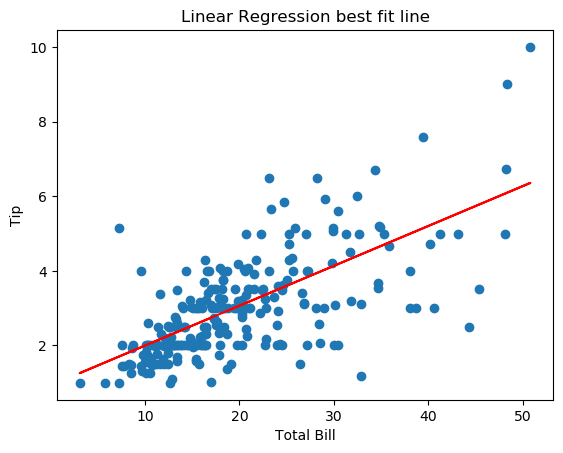

In [24]:
plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color="red")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression best fit line")
plt.show()

# 10.Input-Output Real time

In [27]:
bill_amount=float(input("Enter the bill amount:"))
bill_scaled=scaler.transform([[bill_amount]])
predict_tip=model.predict(bill_scaled)
print(f"Predicted Tip:{predict_tip[0] : .2f}")

Predicted Tip: 4548.81


c:\Users\SAKSHITHA\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [1]:
df.info

NameError: name 'df' is not defined